In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def Uniform(a,b):
    U = np.random.rand()
    res = (b-a)*U + a      # Θέλω να μου επιστρέφει ψευδοτυχαίο αριθμό στο [a,b], όχι στο [0,1]
    return res

def f(x): return np.exp(x) # Εισάγω την ολοκληρωτέα συνάρτηση (χρησιμοποιώ τη numpy για την e^x)

(array([  0.,   0., 107.,  86.,  95.,  82., 115., 114., 106.,  90., 100.,
        105.,   0.]),
 array([-2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <BarContainer object of 13 artists>)

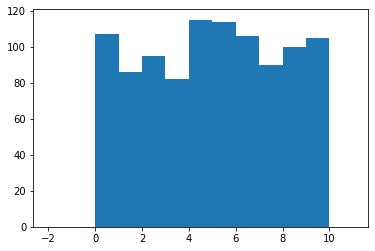

In [12]:
plt.hist( [Uniform(0,10) for i in range(1000)] , bins = range(-2, 12)) # Επιβεβαιώνω ότι μου παράγει ψευδοτυχαίους αριθμούς στο [0,10]

In [13]:
Sf = 0
Sf2 = 0
n = 10000
a,b = 0,10

for i in range(n):
    x = Uniform(a, b)
    y = f(x)
    Sf += y
    Sf2 += y*y

V = b-a                               # Το μόνο που αλλάζει για περισσότερες διαστάσεις
mean = Sf/n                           # Εκτιμητής της μέσης τιμής
s2   = (n/(n-1))*((Sf2/n)-mean**2)    # Εκτιμητής της τετραγωνικής διασποράς
s    = s2**0.5                        # Εκτιμητής της τυπικής απόκλισης

I = V*mean
δI = (V*s)/(n**0.5)

# Για τις θεωρητικές (ακριβείς/αναλυτικές) τιμές των Ι, δΙ έχουμε
Iexact = f(10)-f(0)
# δIexact = V s_f^2/n, όπου sigma^2 = <f^2> - <f>^2
# <f>   = 1/(b-a) *\int_a^b{f(x)dx}
# <f^2> = 1/(b-a) *\int_a^b{f^2(x)dx}

In [14]:
print('I = %2.1f +/- %2.1f'%(I, δI)) # Μπορώ να ελέγξω ότι όσο αυξάνω το n μειώνω το σφάλμα δΙ (αυξάνω την ακρίβεια του υπολογισμού μου)
print('Iexact= %2.1f'%(Iexact))

I = 22907.5 +/- 453.7
Iexact= 22025.5


In [15]:
# ΠΟΛΥΔΙΑΣΤΑΤΟ ΟΛΟΚΛΗΡΩΜΑ
# Αν έχω πολυδιάστατο ολοκλήρωμα η διαδικασία μένει η ίδια. Αυτό που αλλάζει είναι ότι αφενός χρειάζομαι μία γεννήτρια ψευδοτυχαίων αριθμών για κάθε συντεταγμένη (μία γεννήτρια για κάθε διάσταση) και η μεταβλητή V πλέον θα ορίζεται απ'το γινόμενο των διαφορών των διαστημάτων ολοκλήρωσης της κάθε διάστασης

def f(x,y,z): return np.exp(0.2*x*z)+0.7*y**2

Sf = 0
Sf2 = 0
n = 10000
a1,b1 = 0,10
a2,b2 = 0,5
a3,b3 = 1,2

for i in range(n):
    x = Uniform(a1, b1)
    y = Uniform(a2, b2)
    z = Uniform(a3, b3)
    t = f(x,y,z)
    Sf += t
    Sf2 += t*t

V = (b1-a1)*(b2-a2)*(b3-a3)           # Το μόνο που αλλάζει για περισσότερες διαστάσεις
mean = Sf/n                           # Εκτιμητής της μέσης τιμής
s2   = (n/(n-1))*((Sf2/n)-mean**2)    # Εκτιμητής της τετραγωνικής διασποράς
s    = s2**0.5                        # Εκτιμητής της τυπικής απόκλισης

I = V*mean
δI = (V*s)/(n**0.5)
print('I = %2.1f +/- %2.1f'%(I, δI))

I = 641.0 +/- 4.6
